# 데이터분산처리 중간고사

데이터분산처리 중간고사입니다.
아래의 질문들에 대해 실행 결과와 함께 답과 함께 제출 해 주세요.
- .ipynb 파일 형식을 기본으로 하지만, 코드와 설명을 .hwp나 .doc, .pdf 등의 문서로 만들어 제출하셔도 괜찮습니다.


## 문제 0. 답안 작성하기 연습 (10점)

아래 코드는 1부터 1000까지 소수를 찾는 코드이지만 동작하지 않습니다. 문제점을 찾아 고치고 설명하세요.

In [2]:
#고치기 전
primes = []

for n in seq 1 1000: #1은 소수에 포함되지 않으므로 2부터 시작해야함
  for i in seq 1 n: #소수가 아니어도 모든 수는 1로 나누어 떨어지므로 나누는 수(i)는 2부터 시작해야함
    if n / i == 0: #n을 모든 i로 나눈 나머지가 0이 되지 않을 때, 소수 리스트에 포함시키도록 해야함
      primes = i #리스트에 추가하는 방법은 primes.append(n) 또는 primes += n임 / i가 아닌 n을 추가해야함

print(primes)

SyntaxError: invalid syntax (3891745855.py, line 4)

In [3]:
#고친 후
primes = []

for n in range(2, 1001) : 
    prime = True
    for i in range(2, n) :
        if n % i == 0 : #n이 임의의 i로 한번이라도 나누어 떨어지면 n은 소수가 아니므로 다음 n으로 넘어감(break)
            prime = False
            break
    if prime : #prime = True라면, 즉 i에 대한 for문에서 걸리지 않았다면 n은 소수이므로 append
        primes.append(n)

print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


## 문제 1. Random walk 복습 (10점)

어떤 사람의 처음 자산 Q<sub>0</sub>=10이라고 합시다. 자산이 매 순간 (+1, 0, -1)만큼 같은 확률로 변할 수 있다고 합시다. 이를 자산이 0이 될 때까지 계속했을 때 걸리는 반복 횟수(N<sub>end</sub>)을 구하세요.

여러 번 random seed를 바꾸어가며 실험한 결과를 histogram으로 그려 확인하고 평균값을 구하세요.

- 아래 코드는 단순 예시입니다. 마음대로 삭제/수정 해 작성하세요.
- 여기에서는 가능한 한 numpy등의 도움을 받지 않고 python 기본 문법, random모듈만 사용해 작성 해 보세요.

In [33]:
#N_end for certain seed(my_seed)
#input : random seed(my_seed), output : N_end(num_iter)
def get_N_end_using_random(my_seed=42, Q_0=10):
    import random as rd
    rd.seed(my_seed)
    N_end = 0
    
    while (Q_0 > 0):
        r = rd.random()
        if (r < 1/3):
            Q_0 += -1
        elif (r > 2/3):
            Q_0 += 1

        N_end += 1
    
    return N_end

#result = get_num_iter()
#print(result)


In [14]:
#list of all N_end
import math
num_of_seed = 1000

N_end_random_list = [] #x_list(N_end)
for seed in range(num_of_seed): #frequency(random_seed)
    N_end_random_list.append(get_N_end_using_random(seed))

#print(N_end_list)

#mean value of all N_end
sum_of_list = sum(N_end_random_list)
mean_of_list = sum_of_list / len(N_end_random_list)

#print(mean_of_list)

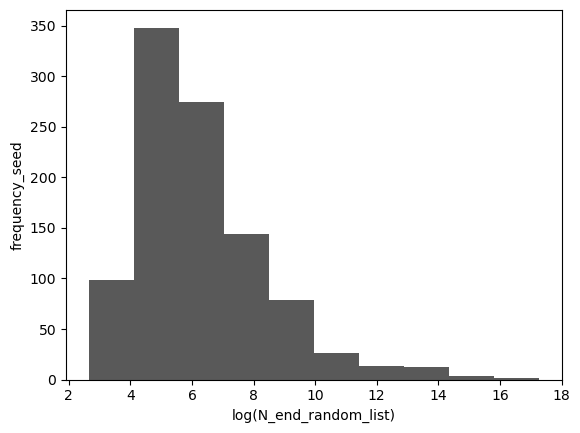

In [15]:
#histogram of N_end & random seed
import matplotlib.pyplot as plt
#plt.hist(N_end_list, color='0.35')
for i in range(len(N_end_random_list)):
    N_end_random_list[i] = math.log(N_end_random_list[i])
plt.hist(N_end_random_list, color='0.35')
plt.xlabel('log(N_end_random_list)')
plt.ylabel('frequency_seed')
plt.show()

## 문제 2. 코드 최적화/가속하고 실행 시간 측정하기

위 실험에서 Q<sub>0</sub>에 따라 N<sub>end</sub>의 평균값이 달라질 것을 쉽게 알 수 있습니다. 따라서 Q<sub>0</sub>과 N<sub>end</sub>간의 관계를 실험을 통해 구해보려 합니다.

그런데 이때 random walk의 증가 감소는 1칸씩으로 제한되어 있기 때문에 Q<sub>0</sub>값이 커짐에 따라 계산 시간도 계속 늘어나게 됩니다. 강의 시간에 살펴본 바와 같이 시뮬레이션을 위한 절대적인 시간 자체를 줄일 필요가 있습니다.

코드를 최적화해서 계산 시간을 절약 해 보세요.

### 2-0. 위의 코드의 실행 시간을 측정하세요. (20점)
- 가능한 계산 자원, 실행시간 내에서 최대한 많은 실험을 해 보세요.
- 실행 시간도 함께 측정하세요. import time 을 사용하실 수 있고, 아니면 %%time 커맨드를 사용하실 수도 있습니다. 별도의 .py파일로 만들어 time명령어를 활용하셔도 됩니다.

In [39]:
#numpy 미활용 : 시간 측정
import time
from tqdm import tqdm
import math 
#input : Q_0, output : run time
N_end_random_list = []
time_random_list = []

Q_0 = 300

total_start_time = time.time()

for i in tqdm(range(1, Q_0+1)):
    start_time = time.time()
    N_end_random = []
    for seed in range(5):
        N = get_N_end_using_random(seed, Q_0=i)
        N_end_random.append(N)
    sum_of_list = sum(N_end_random)
    N_end = sum_of_list / len(N_end_random)
    finish_time = time.time()
    run_time = (finish_time - start_time)
    N_end_random_list.append(N_end)
    time_random_list.append(run_time)
    
total_finish_time = time.time()
total_run_time = (total_finish_time - total_start_time)

print(total_run_time) # 51.1 sec

100%|██████████| 300/300 [00:51<00:00,  5.87it/s]

51.0984628200531


### 2-1. numpy를 최대한 이용해 최적화 해 보세요. (20점)
- 실험 횟수는 2-1에서 한 것과 같은 조건으로 맞추세요.
- 2-1에서 한 것과 같은 방식으로 실행 시간을 측정하세요.

In [40]:
import numpy as np

def get_N_end_using_numpy(my_seed=42, Q_0=10, step_n=1024*16):
    np.random.seed(my_seed)
    steps = np.random.choice(a=[-1,0,1], size = step_n)
    path = Q_0 + np.cumsum(steps)
    
    if (np.where(path==0)[0].size != 0):
        return np.where(path==0)[0][0]

    return get_N_end_using_numpy(my_seed, Q_0, step_n*4)

#result_numpy = get_N_end_using_numpy()
#print(result_numpy)

In [45]:
import time
from tqdm import tqdm
import math
N_end_numpy_list = []
time_numpy_list = []

Q_0 = 300    

total_start_time = time.time()

for i in tqdm(range(1, Q_0+1)):
    start_time = time.time()
    N_end_numpy = []
    for seed in range(5):
        N = get_N_end_using_numpy(seed, Q_0=i)
        N_end_numpy.append(N)
    N_end = np.mean(N_end_numpy)
    finish_time = time.time()
    run_time = (finish_time - start_time)
    N_end_numpy_list.append(N_end)
    time_numpy_list.append(run_time)
    
total_finish_time = time.time()
total_run_time = (total_finish_time - total_start_time)

print(total_run_time) # 5.2 sec

100%|██████████| 300/300 [00:05<00:00, 57.28it/s] 

5.240609884262085


### 2-2. numba.jit를 이용해 최적화 해 보세요. (10점)
- 2-1과 동일하게 해 보세요

In [42]:
from numba import jit
import random as rd
import numpy as np

@jit(nopython=True)
def get_N_end_using_numba(my_seed=42, Q_0=10):
    rd.seed(my_seed)
    N_end = 0
    
    while (Q_0 > 0):
        r = rd.random()
        
        if (r < 1/3):
            Q_0 += -1
        elif (r > 2/3): 
            Q_0 += 1
        
        N_end +=1
    return N_end

#result_numba = get_N_end_using_numba()
#print(result_numba)

In [44]:
import time
from tqdm import tqdm
from numba import jit
N_end_numba_list = []
time_numba_list = []
Q_0 = 300

total_start_time = time.time()

for i in tqdm(range(1, Q_0+1)):
    start_time = time.time() 
    N_end_numba = []
    for seed in range(5):
        N_end_numba.append(get_N_end_using_numba(seed, Q_0=i))
    sum_of_list = sum(N_end_numba)
    N_end = sum_of_list / len(N_end_numba)
    finish_time = time.time()
    run_time = (finish_time - start_time)
    N_end_numba_list.append(N_end)
    time_numba_list.append(run_time)
    
total_finish_time = time.time()
total_run_time = (total_finish_time - total_start_time)

print(total_run_time) #1.89 sec


100%|██████████| 300/300 [00:01<00:00, 159.57it/s] 

1.8833861351013184


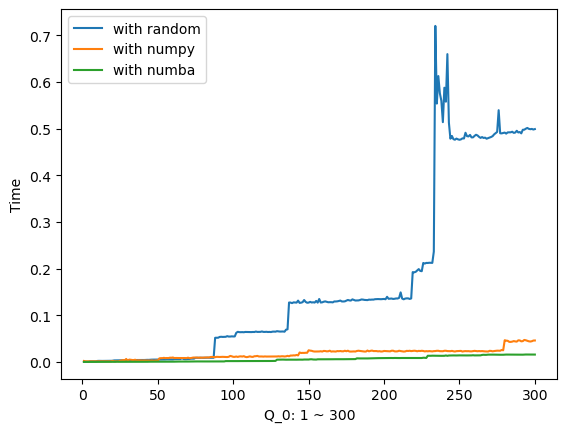

In [46]:
#random, numpy, numba 비교
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random as rd

Q_0 = 300
Q_0_list = []
for i in range(1, Q_0+1):
    Q_0_list.append(i)

plt.plot(Q_0_list, time_random_list, label="with random")
plt.plot(Q_0_list, time_numpy_list, label="with numpy")
plt.plot(Q_0_list, time_numba_list, label="with numba")
plt.xlabel(f"Q_0: {Q_0_list[0]} ~ {Q_0_list[-1]}")
plt.ylabel("Time")
plt.legend()
plt.show()

### 2-3. 별도의 .py파일을 만든 다음 동시에 여러 개 실행해 보세요. (10점)
- 전체 실행 시간을 측정해 성응을 비교하세요. 리눅스 환경이라면 time 명령어를 이용하실 수 있습니다.
- 2-1과 2-2에서 이미 최적화를 했다면 최적화 된 결과 코드를 활용하시면 좋습니다.

In [ ]:
#2-3의 모든 파일은 .txt로 ipynb파일과 함께 첨부해두었습니다.
#터미널에서 timecheck_np.sh(또는 timecheck_rd.sh)를 실행하여 real time(전체 실행 시간)을 측정할 수 있습니다.

## using numpy

In [ ]:
#timecheck_np.sh
#터미널에 './timecheck_np.sh' 작성
#!/bin/bash

#개인 노트북의 최대 CPU 개수가 8개였음
MINPROC=1
MAXPROC=8

touch time_by_using_process_number.txt

for PROC in `seq $MINPROC $MAXPROC`; do
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
  echo number of process: $PROC | tee -a time_by_using_process_number.txt
  (time ./run_numpy.sh $PROC) 2>&1 | tee -a time_by_using_process_number.txt
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
done

In [ ]:
#get_N_end_numpy.py

import numpy as np
import argparse, sys
import time


parser = argparse.ArgumentParser()
parser.add_argument('-seed', help=' : Set seed of random(or numpy.random) Module, default=42', default=42)
parser.add_argument('-Q_0', help=' : Set initial asset Q_0, default=10', default=10)
parser.add_argument('-step_n', help=' : Set initial step number, default=1024', default=1024)
args=parser.parse_args()


def get_N_end_using_numpy(my_seed=42, Q_0=10, step_n=1024*16):
    np.random.seed(my_seed)
    steps = np.random.choice(a=[-1, 0, 1], size=step_n)
    path = Q_0 + np.cumsum(steps)

    if (np.where(path==0)[0].size != 0):
        return np.where(path==0)[0][0]

    return get_N_end_using_numpy(my_seed, Q_0, step_n*4)



def main(argv, args):
    start_time = time.time()
    N_end = get_N_end_using_numpy(int(args.seed), int(args.Q_0), int(args.step_n))
    end_time = time.time()
    duration = end_time - start_time
    print(f"{int(args.Q_0)}, {N_end}, {duration}")


if __name__ == '__main__':
    argv = sys.argv
    main(argv ,args)

In [ ]:
#run_numpy.sh

#!/bin/bash

touch data_using_${1}process.txt
echo Q_0, N_end, time >> data_using_${1}process.txt

START=1
END=400

#Q_0에 1부터 400까지 넣는 과정을 실행함
#위의 과정을 1부터 8개까지의 CPU를 사용하는 프로세스를 순서대로 진행하고, 진행 시간을 따로 기록함(.txt파일)
for Q0 in `seq $START $END`; do
  echo get_N_end_numpy.py -Q_0 $Q0
done | xargs -n 3 -P $1 python >> data_using_${1}process_np.txt

## using random

In [ ]:
#timecheck_rd.sh
#터미널에 './timecheck_rd.sh' 작성
#만약 'Permision denied'가 뜬다면 터미널에 'chmod 777 ./run_random/sh', 'chmod 777 ./timecheck_rd.sh'작성 후 재실행

#!/bin/bash

MINPROC=1
MAXPROC=8

touch time_by_using_process_number.txt

for PROC in `seq $MINPROC $MAXPROC`; do
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
  echo number of process: $PROC | tee -a time_by_using_process_number.txt
  (time ./run_random.sh $PROC) 2>&1 | tee -a time_by_using_process_number.txt
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
done

In [ ]:
#get_N_end_random.py
from random import seed, random
import argparse, sys
import time

parser = argparse.ArgumentParser()
parser.add_argument('-seed', help=' : Set seed of random(or numpy.random) Module, default=42', default=42)
parser.add_argument('-Q_0', help=' : Set initial asset Q_0, default=10', default=10)
args=parser.parse_args()

def get_N_end_using_random(my_seed=42, Q_0=10):
    import random as rd
    rd.seed(my_seed)
    N_end = 0
    
    while (Q_0 > 0):
        r = rd.random()
        if (r < 1/3):
            Q_0 += -1
        elif (r > 2/3):
            Q_0 += 1

        N_end += 1
    
    return N_end

def main(argv, args):
    start_time = time.time()
    N_end = get_N_end_using_random(int(args.seed), int(args.Q_0))
    end_time = time.time()
    duration = end_time - start_time
    print(f"{int(args.Q_0)}, {N_end}, {duration}")

if __name__ == '__main__':
    argv = sys.argv
    main(argv ,args)

In [ ]:
#run_random.sh

#!/bin/bash

touch data_using_${1}process.txt
echo Q_0, N_end, time >> data_using_${1}process.txt

START=1
END=400

for Q0 in `seq $START $END`; do
  echo get_N_end_random.py -Q_0 $Q0
done | xargs -n 3 -P $1 python >> data_using_${1}process_rd.txt

## using numba

In [ ]:
#timecheck_nb.sh
#터미널에 './timecheck_nb.sh' 작성
#만약 'Permision denied'가 뜬다면 터미널에 'chmod 777 ./run_numba/sh', 'chmod 777 ./timecheck_nb.sh'작성 후 재실행

#!/bin/bash

MINPROC=1
MAXPROC=8

touch time_by_using_process_number.txt

for PROC in `seq $MINPROC $MAXPROC`; do
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
  echo number of process: $PROC | tee -a time_by_using_process_number.txt
  (time ./run_numba.sh $PROC) 2>&1 | tee -a time_by_using_process_number.txt
  echo --------------------------------------------------- | tee -a time_by_using_process_number.txt
done

In [ ]:
#get_N_end_numba.py

from random import seed, random
import argparse, sys
import time
from numba import jit


parser = argparse.ArgumentParser()
parser.add_argument('-seed', help=' : Set seed of random(or numpy.random) Module, default=42', default=42)
parser.add_argument('-Q_0', help=' : Set initial asset Q_0, default=10', default=10)
args=parser.parse_args()


@jit(nopython=True)
def get_N_end_using_numba(my_seed=42, Q_0=10):
    seed(my_seed)
    N_end = 0
    
    while (Q_0 > 0):
        r = random()
        
        if (r < 1/3):
            Q_0 += -1
        elif (r > 2/3): 
            Q_0 += 1
        
        N_end +=1
    return N_end

def main(argv, args):
    start_time = time.time()
    N_end = get_N_end_using_numba(int(args.seed), int(args.Q_0))
    end_time = time.time()
    duration = end_time - start_time
    print(f"{int(args.Q_0)}, {N_end}, {duration}")


if __name__ == '__main__':
    argv = sys.argv
    main(argv ,args)

In [ ]:
#run_numba.sh

#!/bin/bash

touch data_using_${1}process.txt
echo Q_0, N_end, time >> data_using_${1}process.txt

START=1
END=400

#Q_0에 1부터 400까지 넣는 과정을 실행함
#위의 과정을 1부터 8개까지의 CPU를 사용하는 프로세스를 순서대로 진행하고, 진행 시간을 따로 기록함(.txt파일)
for Q0 in `seq $START $END`; do
  echo get_N_end_numba.py -Q_0 $Q0
done | xargs -n 3 -P $1 python >> data_using_${1}process_np.txt

## 3. 계산 시간에 대해 종합해 주세요. (10점)
2-3에서 동시에 여러 개의 시뮬레이션을 실행할 때 process갯수와 실행 시간 사이의 관계를 그려보세요.
- 실행 시간 사이의 비율을 구해 Speedup 으로 표시해 그려보세요.
- 최적화를 하지 않았을 때, 최적화를 했을 때를 비교해 Speedup 그래프를 겹쳐 그려보세요.

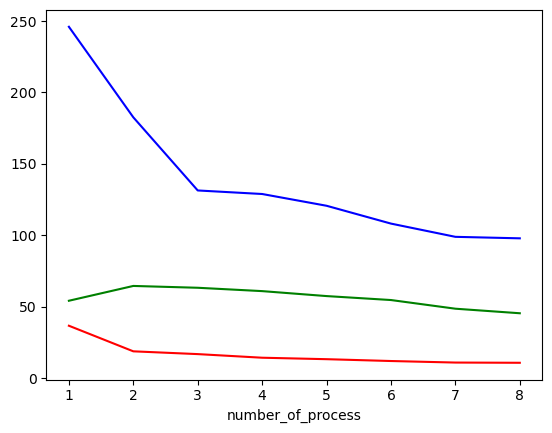

In [50]:
import matplotlib.pyplot as plt

number_of_process = []
for i in range(1,9):
    number_of_process.append(i)
#print(number_of_process)

#prcess을 돌려 나온 결과 list
time_rd = [36.605, 18.680, 16.734, 14.202, 13.177, 11.894, 10.816, 10.658]
time_np = [54.101, 64.473, 63.198, 60.847, 57.373, 54.601, 48.532, 45.343]
time_nb = [245.976, 182.572, 131.346, 128.865, 120.627, 108.138, 98.865, 97.822]

plt.plot(number_of_process, time_rd, '-r')
plt.xlabel('number_of_process')
plt.plot(number_of_process, time_np, '-g')
plt.plot(number_of_process, time_nb, '-b')

[0.5103127987979784, 0.8958244111349037, 0.8486912871997131, 0.9278270666103365, 0.9026333763375579, 0.9093660669244998, 0.9853920118343195]
[1.1917154950925122, 0.980224279931134, 0.9627994556789772, 0.9429059772872943, 0.9516845903125164, 0.8888481895935971, 0.9342907772191545]


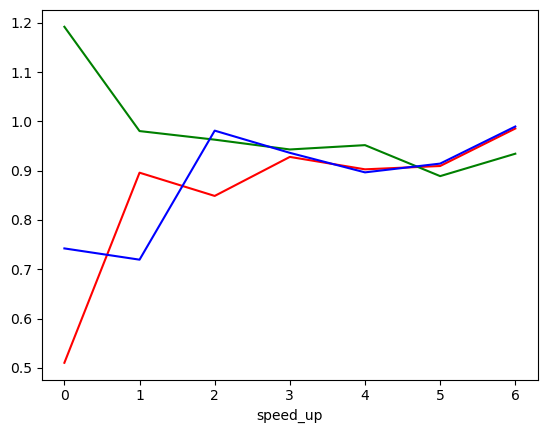

In [51]:
import matplotlib.pyplot as plt

time_rd_speedup = []
time_np_speedup = []
time_nb_speedup = []

i = 0
while (i < 7):
    rate = time_rd[i+1]/time_rd[i]
    time_rd_speedup.append(rate)
    i += 1
i = 0
while (i < 7):
    rate = time_np[i+1]/time_np[i]
    time_np_speedup.append(rate)
    i += 1
i = 0
while (i < 7):
    rate = time_nb[i+1]/time_nb[i]
    time_nb_speedup.append(rate)
    i += 1
    
print(time_rd_speedup)
print(time_np_speedup)

plt.plot(time_rd_speedup, '-r')
plt.xlabel('speed_up')
plt.plot(time_np_speedup, '-g')
plt.plot(time_nb_speedup, '-b')


## 4. 실험 결과에 대해 종합해 주세요. (10점)
N<sub>end</sub>과 Q<sub>0</sub>의 관계를 그려보세요.

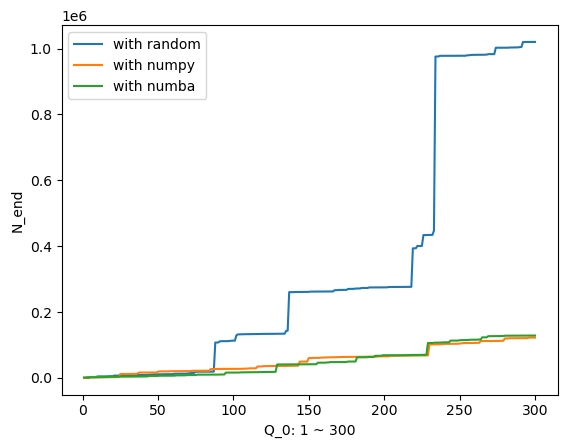

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import random as rd

Q_0 = 300
Q_0_list = []
for i in range(1, Q_0+1):
    Q_0_list.append(i)

plt.plot(Q_0_list, N_end_random_list, label="with random")
plt.plot(Q_0_list, N_end_numpy_list, label="with numpy")
plt.plot(Q_0_list, N_end_numba_list, label="with numba")
plt.xlabel(f"Q_0: {Q_0_list[0]} ~ {Q_0_list[-1]}")
plt.ylabel("N_end")
plt.legend()
plt.show()